In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Import data from the csv files that we took from the Vector Network Analyzer:

In [8]:
#S11 data of the antenna with an infinite metal plane 
plaque_s11 = pd.read_csv("TXT100.CSV",delimiter=",",skiprows=11)
plaque_s11 = plaque_s11.drop(columns="Unnamed: 2")

#S11 data of the antenna inside the round tin can 
can_s11 = pd.read_csv("TXT102.CSV",delimiter=",",skiprows=11)
can_s11 = can_s11.drop(columns="Unnamed: 2")

#S11 data of the LNAs
ampli_s11 = pd.read_csv("TXT103.CSV",delimiter=",",skiprows=11)
ampli_s11 = ampli_s11.drop(columns="Unnamed: 2")

#S12 data of the LNAs
ampli_s12 = pd.read_csv("TXT104.CSV",delimiter=",",skiprows=11)
ampli_s12 = ampli_s12.drop(columns="Unnamed: 2")

#S11 data of the LNAs with the antenna
ampli_antenne_s11 = pd.read_csv("TXT105.CSV",delimiter=",",skiprows=11)
ampli_antenne_s11 = ampli_antenne_s11.drop(columns="Unnamed: 2")

#plaque_smith = pd.read_csv("TXT101.CSV",delimiter=",")

### Plot of S11 for the antenna for both the infinite plane and the can:

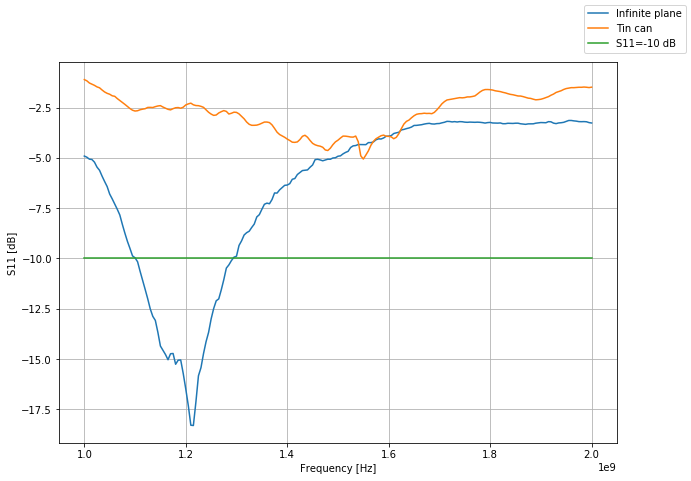

In [22]:
plt.figure(figsize=(10, 7))
plt.plot(plaque_s11.Hz, plaque_s11.dB, can_s11.Hz, can_s11.dB, plaque_s11.Hz, [-10]*201)
plt.grid()
plt.xlabel("Frequency [Hz]")
plt.ylabel("S11 [dB]")
plt.figlegend(('Infinite plane', 'Tin can', 'S11=-10 dB'))
plt.show()

In [38]:
#find the resonant frequency (i.e. the min of s11 parameter)

plaque_s11.loc[plaque_s11['dB'].idxmin()]

Hz    1.215000e+09
dB   -1.829900e+01
Name: 43, dtype: float64

In [39]:
#find the resonant frequency (i.e. the min of s11 parameter)

can_s11.loc[can_s11['dB'].idxmin()]

Hz    1.550000e+09
dB   -5.061000e+00
Name: 110, dtype: float64

S11 is return loss of device, this parameter measures how much input power given to the device is reflected back at input port. Ideally there should not be any reflected power and 100% power should delivered to device.

S11 below -10dB means at least 90% input power is delivered to device and reflected power is less than 10%. This value is sufficient for many applications.

So the goal is to have S11 below -10 dB.

We can see from the blue curve above that the antenna radiates best at approximately 1.22 GHz, with S11 being well below the threshold value of -10 dB (-18.299 dB exactly). However, for radiastronomy the target frequency is the neutral hydrogen line at 21 cm, i.e. 1.42 GHz. This frequency has S11 above -10 dB, which means it is not ideal (a lot of power loss at this frequency).

For the yellow curve (tin can), the S11 results are even worse, with the S11 parameter never going below the threshold value over the entire frequency range. Hence, the design for the waveguide needs to be improved. This can be done either by changing the diameter of the can, or changing the height of the antenna in the can. For this setup, the antenna radiates best at 1.55 GHz, with S11=-5.06 dB.

### Plot of the S11 data for the series of two LNAs, with and without the antenna:

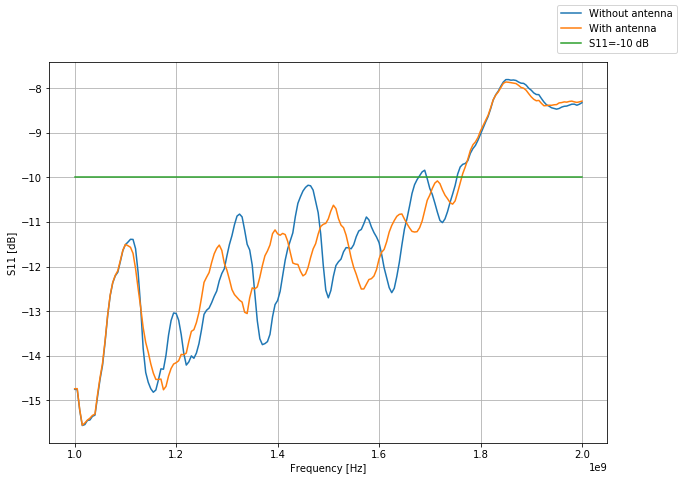

In [20]:
plt.figure(figsize=(10, 7))
plt.plot(ampli_s11.Hz, ampli_s11.dB, ampli_antenne_s11.Hz, ampli_antenne_s11.dB, ampli_s11.Hz, [-10]*201)
plt.grid()
plt.xlabel("Frequency [Hz]")
plt.ylabel("S11 [dB]")
plt.figlegend(('Without antenna', 'With antenna', 'S11=-10 dB'))
plt.show()

We see that if we define the bandwidth of the LNAs to be the frequencies for which the S11 value is below the threshold value of -10 dB, then the bandwidth of both the LNAs with and without the antenna can be said to be [1.0 Ghz, 1.7 Ghz] approximately.
This is a good bandwidth if we want to observe the neutral hydrogen line at 1.42 GHz. We also see that the S11 data is roughly the same for both with and without the antenna. This means that the LNAs work correctly for this particular antenna, as they receive well in the target bandwidth and the resonant frequency of the antenna (which we can take to be the average between 1.2 GHz and 1.55 GHz, approximately 1.38 GHz) is well within this bandwidth.

LNAs are needed to amplifiy the received signal, sicne radio signals are very weak, and also reduce the noise on the data (a normal amplifier amplifies the signal but also introduces noise).

### Plot of the S12 data for the series of two LNAs without the antenna:

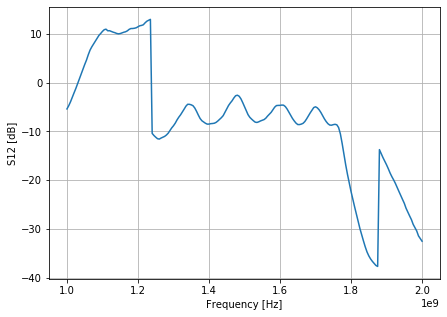

In [40]:
plt.figure(figsize=(7, 5))
plt.plot(ampli_s12.Hz, ampli_s12.dB)
plt.grid()
plt.xlabel("Frequency [Hz]")
plt.ylabel("S12 [dB]")
plt.show()